## Data 
Satisfaction:--Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

Age:--The actual age of the passengers

Gender:--Gender of the passengers (Female, Male)

Type of Travel:--Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class:--Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Customer Type:--The customer type (Loyal customer, disloyal customer)

Flight distance:--The flight distance of this journey

Inflight wifi service:--Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Ease of Online booking:--Satisfaction level of online booking

Inflight service:--Satisfaction level of inflight service

Online boarding:--Satisfaction level of online boarding

Inflight entertainment:--Satisfaction level of inflight entertainment

Food and drink:--Satisfaction level of Food and drink

Seat comfort:--Satisfaction level of Seat comfort

On-board service:--Satisfaction level of On-board service

Leg room service:--Satisfaction level of Leg room service

Departure/Arrival time convenient:--Satisfaction level of Departure/Arrival time convenient

Baggage handling:--Satisfaction level of baggage handling

Gate location:--Satisfaction level of Gate location

Cleanliness:--Satisfaction level of Cleanliness

Check-in service:--Satisfaction level of Check-in service

Departure Delay in Minutes:--Minutes delayed when departure

Arrival Delay in Minutes:--Minutes delayed when Arrival

Flight cancelled:--Whether the Flight cancelled or not (Yes, No)

Flight time in minutes:--Minutes of Flight takes

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from time import time
from warnings import filterwarnings
filterwarnings("ignore")
plt.style.use("ggplot")
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,plot_roc_curve,accuracy_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [135]:
loc=os.getcwd()+"\\DPhi challenge\\Data Srpint 73\\"

In [137]:
df_train=pd.read_csv(loc+"train_dataset.csv")
df_test=pd.read_csv(loc+"test_dataset.csv")

In [142]:
df_train=df_train.drop("Unnamed: 0",axis=1)

In [143]:
df_train

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
0,69,909,2,5,2,4,3,3,1,4,...,5,0.0,1,0,0,1,0,1,0,neutral or dissatisfied
1,63,481,2,2,2,2,5,5,4,4,...,0,0.0,1,0,1,0,1,0,0,satisfied
2,70,2816,1,1,2,1,2,2,2,4,...,0,0.0,1,0,1,0,1,0,0,satisfied
3,49,250,4,4,3,4,4,4,4,4,...,0,0.0,0,1,1,0,0,1,0,neutral or dissatisfied
4,41,2399,3,2,2,5,5,3,5,5,...,2,0.0,1,0,1,0,1,0,0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72512,61,862,2,5,2,1,2,4,5,1,...,0,10.0,1,0,0,1,0,1,0,neutral or dissatisfied
72513,43,1130,2,2,2,2,4,5,5,2,...,0,0.0,0,1,1,0,1,0,0,satisfied
72514,7,1199,2,4,2,2,3,2,3,3,...,57,51.0,1,0,0,1,0,0,1,neutral or dissatisfied
72515,49,1635,3,3,3,3,5,4,4,3,...,24,15.0,1,0,1,0,1,0,0,satisfied


In [144]:
df_test

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,46,1622,1,1,1,1,5,5,5,4,...,5,276,270.0,0,1,1,0,1,0,0
1,45,552,3,1,3,4,4,5,5,5,...,5,0,0.0,1,0,0,1,0,1,0
2,52,435,2,2,2,2,3,4,5,4,...,4,0,0.0,0,1,1,0,1,0,0
3,41,655,2,5,2,3,4,2,1,4,...,4,0,0.0,1,0,0,1,0,1,0
4,39,337,2,0,1,3,5,1,5,5,...,5,0,0.0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21751,17,1020,1,4,1,4,4,1,4,4,...,4,56,50.0,1,0,0,1,0,1,0
21752,40,3568,3,3,3,3,4,5,4,4,...,5,5,0.0,1,0,1,0,1,0,0
21753,30,399,3,3,4,3,2,4,4,2,...,2,47,40.0,1,0,1,0,0,1,0
21754,27,1197,5,4,4,4,5,5,5,5,...,5,1,0.0,1,0,1,0,0,1,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72517 entries, 0 to 72516
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                72517 non-null  int64  
 1   Flight Distance                    72517 non-null  int64  
 2   Inflight wifi service              72517 non-null  int64  
 3   Departure/Arrival time convenient  72517 non-null  int64  
 4   Ease of Online booking             72517 non-null  int64  
 5   Gate location                      72517 non-null  int64  
 6   Food and drink                     72517 non-null  int64  
 7   Online boarding                    72517 non-null  int64  
 8   Seat comfort                       72517 non-null  int64  
 9   Inflight entertainment             72517 non-null  int64  
 10  On-board service                   72517 non-null  int64  
 11  Leg room service                   72517 non-null  int

In [6]:
#to check null values
df_train.isnull().sum()

Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Gender_Female                        0
Gender_Male                          0
Type of Travel_Business travel       0
Type of Travel_Personal Travel       0
Class_Business                       0
Class_Eco                            0
Class_Eco Plus                       0
satisfaction             

In [7]:
#to check correlation with target variable
df_train["Target"]=df_train["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0})

In [8]:
df_train.corr()["Target"].sort_values()

Class_Eco                           -0.451106
Type of Travel_Personal Travel      -0.446565
Class_Eco Plus                      -0.104822
Arrival Delay in Minutes            -0.057139
Departure Delay in Minutes          -0.049704
Departure/Arrival time convenient   -0.047315
Gender_Female                       -0.013731
Gate location                        0.002784
Gender_Male                          0.013731
Age                                  0.135630
Ease of Online booking               0.174494
Food and drink                       0.211400
Checkin service                      0.238007
Inflight service                     0.245305
Baggage handling                     0.248566
Inflight wifi service                0.286429
Flight Distance                      0.300562
Cleanliness                          0.305799
Leg room service                     0.317181
On-board service                     0.323941
Seat comfort                         0.352265
Inflight entertainment            

In [9]:
#so as we see online boarding and class of airline..and many other features are highly correlated with our target variable

<AxesSubplot:>

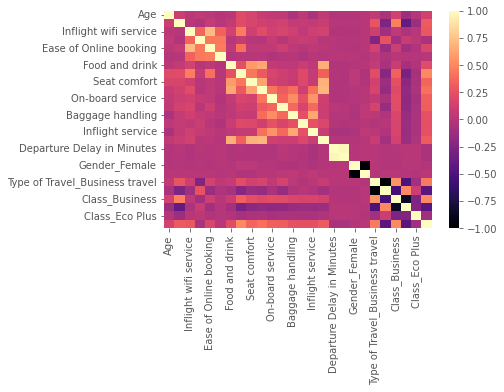

In [10]:
sns.heatmap(df_train.corr(),cmap="magma")

In [11]:
#drop the additional feature we added
df_train.drop("Target",axis=1,inplace=True)

In [12]:
#Type of Travel_Business travel, Class_Business, Online boarding
#lets explore some visualisation with above features

In [13]:
df_train["Online boarding"].value_counts()

4    21562
3    15202
5    14419
2    12272
1     7365
0     1697
Name: Online boarding, dtype: int64

<AxesSubplot:xlabel='Online boarding', ylabel='count'>

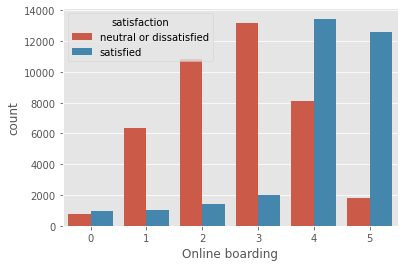

In [14]:
sns.countplot(x="Online boarding",data=df_train,hue="satisfaction")
#as we see the level of satisfaction for 4 to 5 rating is high than overall

In [15]:
df_train["Class_Business"].value_counts()

0    37765
1    34752
Name: Class_Business, dtype: int64

<AxesSubplot:xlabel='Class_Business', ylabel='count'>

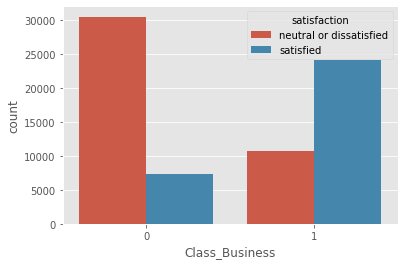

In [16]:
sns.countplot(x="Class_Business",data=df_train,hue="satisfaction")
#so clearly business class passengers are more satisfied(with all the luxury they give) when compared to simple regular class

In [17]:
df_train["satisfaction"].value_counts()

neutral or dissatisfied    41092
satisfied                  31425
Name: satisfaction, dtype: int64

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

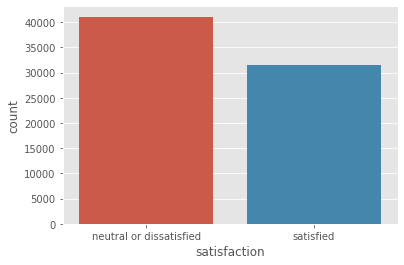

In [18]:
#in this particular dataset..not so satisfied cases are more when compared to satisfied customers
sns.countplot(x="satisfaction",data=df_train)

<AxesSubplot:xlabel='Type of Travel_Business travel', ylabel='count'>

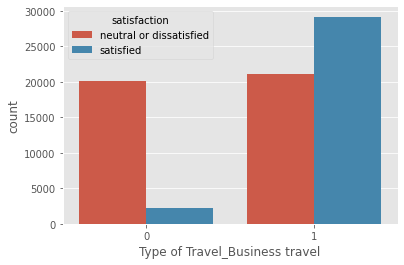

In [19]:
sns.countplot(x="Type of Travel_Business travel",data=df_train,hue="satisfaction")

<AxesSubplot:xlabel='Age', ylabel='Flight Distance'>

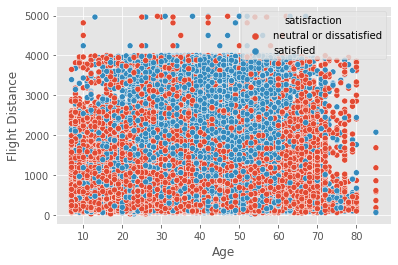

In [20]:
sns.scatterplot(x="Age",y="Flight Distance",data=df_train,hue="satisfaction")

<AxesSubplot:xlabel='satisfaction', ylabel='Age'>

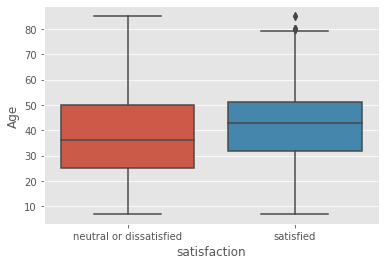

In [21]:
sns.boxplot(x="satisfaction",y="Age",data=df_train)

<AxesSubplot:xlabel='satisfaction', ylabel='Flight Distance'>

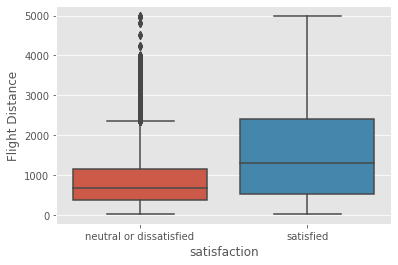

In [22]:
sns.boxplot(x="satisfaction",y="Flight Distance",data=df_train)

In [23]:
#as there are alot of outliers in the case of dissatisfaction vs flight distance 

In [24]:
df_train[["Flight Distance","satisfaction"]]

,Flight Distance,satisfaction
0,909,neutral or dissatisfied
1,481,satisfied
2,2816,satisfied
3,250,neutral or dissatisfied
4,2399,neutral or dissatisfied
...,...,...
72512,862,neutral or dissatisfied
72513,1130,satisfied
72514,1199,neutral or dissatisfied
72515,1635,satisfied


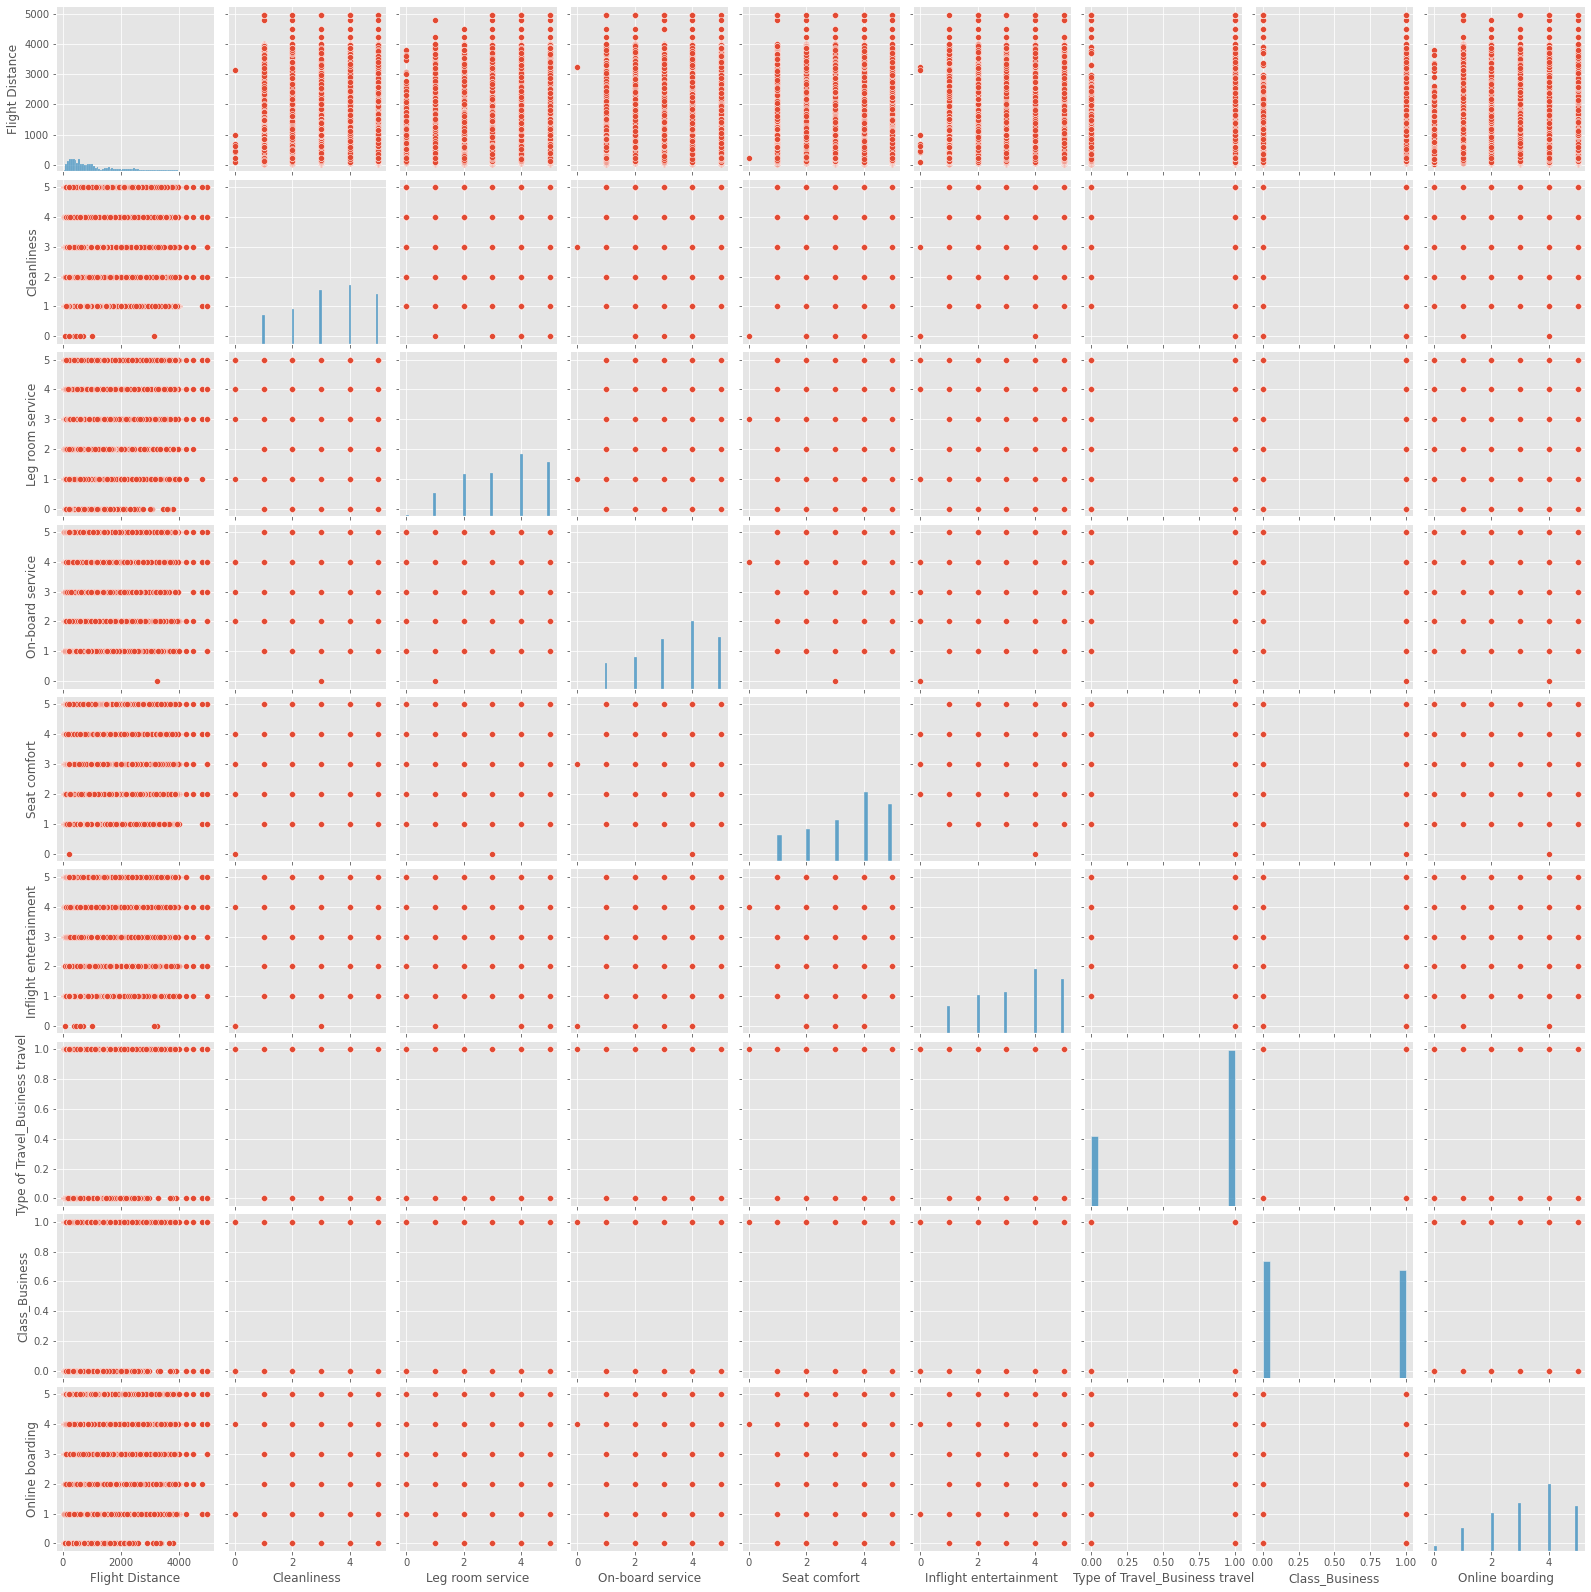

In [25]:
#pairplot of high correlation features only
'''
Flight Distance                      0.300562
Cleanliness                          0.305799
Leg room service                     0.317181
On-board service                     0.323941
Seat comfort                         0.352265
Inflight entertainment               0.399690
Type of Travel_Business travel       0.446565
Class_Business                       0.503307
Online boarding                      0.504510
'''
sns.pairplot(df_train[["Flight Distance","Cleanliness","Leg room service","On-board service","Seat comfort","Inflight entertainment",
                       "Type of Travel_Business travel","Class_Business","Online boarding","satisfaction"]])

In [26]:
#Most of the data is categorical only

In [27]:
#lets setup our data

In [35]:
#lets define a function
def procedure(model):
    #data setup
    X=df_train.drop("satisfaction",axis=1)
    y=df_train["satisfaction"]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
    
    #model setup
    t=time()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    time_taken=time()-t
    
    print("####%s####"%(str(model)))
    print("Accuracy Score: %s"%(accuracy_score(y_test,y_pred)))
    print("Duration: {} seconds".format(round(time_taken,3)))
    print("\n")

In [36]:
#just passing default parameters models..models that dont require any scaling
models=[DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

In [37]:
for i in models:
    procedure(i)

####DecisionTreeClassifier()####
Accuracy Score: 0.9339952197095054
Duration: 0.489 seconds


####RandomForestClassifier()####
Accuracy Score: 0.9560121345835632
Duration: 8.877 seconds


####AdaBoostClassifier()####
Accuracy Score: 0.9109211252068395
Duration: 8.055 seconds


####GradientBoostingClassifier()####
Accuracy Score: 0.9333976833976834
Duration: 10.907 seconds




In [38]:
#so for default parameters right off the back trees model did the best..with accuracy above 90%

In [39]:
# so lets perform gridsearch for different trees 

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72517 entries, 0 to 72516
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                72517 non-null  int64  
 1   Flight Distance                    72517 non-null  int64  
 2   Inflight wifi service              72517 non-null  int64  
 3   Departure/Arrival time convenient  72517 non-null  int64  
 4   Ease of Online booking             72517 non-null  int64  
 5   Gate location                      72517 non-null  int64  
 6   Food and drink                     72517 non-null  int64  
 7   Online boarding                    72517 non-null  int64  
 8   Seat comfort                       72517 non-null  int64  
 9   Inflight entertainment             72517 non-null  int64  
 10  On-board service                   72517 non-null  int64  
 11  Leg room service                   72517 non-null  int

In [41]:
X=df_train.drop("satisfaction",axis=1)
#dropping columns to avoid multi-collinearity
X=X.drop(["Gender_Female","Type of Travel_Personal Travel","Class_Eco"],axis=1)
y=df_train["satisfaction"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)

In [42]:
X_train

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Type of Travel_Business travel,Class_Business,Class_Eco Plus
2216,56,2248,3,2,2,2,5,3,3,3,...,3,4,3,1,8,0.0,0,1,0,0
52638,66,1121,2,1,2,3,1,2,2,4,...,4,2,4,3,0,0.0,0,0,1,0
26641,60,861,5,5,5,5,2,5,5,5,...,5,4,5,3,20,0.0,0,1,1,0
42039,16,1276,2,2,2,4,2,2,3,2,...,2,2,3,2,9,8.0,0,0,0,0
46786,52,326,5,1,1,1,4,4,2,4,...,4,5,4,4,0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,58,304,2,1,1,1,5,2,3,3,...,3,4,3,3,0,0.0,0,1,0,1
55293,22,342,2,3,2,1,4,2,4,4,...,5,3,4,4,43,40.0,0,0,0,0
49751,41,1123,3,1,3,3,2,3,2,2,...,3,2,4,2,4,33.0,1,0,0,1
5695,47,957,2,4,3,4,1,3,3,2,...,2,2,2,2,0,9.0,1,1,1,0


In [43]:
param_grid={"criterion":["gini","entropy"],"max_features":["auto","log2"]}

In [44]:
model=DecisionTreeClassifier()

In [45]:
grid=GridSearchCV(estimator=model,param_grid=param_grid,verbose=3,cv=5)

In [46]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .criterion=gini, max_features=auto;, score=0.912 total time=   0.0s
[CV 2/5] END .criterion=gini, max_features=auto;, score=0.927 total time=   0.0s
[CV 3/5] END .criterion=gini, max_features=auto;, score=0.921 total time=   0.0s
[CV 4/5] END .criterion=gini, max_features=auto;, score=0.908 total time=   0.1s
[CV 5/5] END .criterion=gini, max_features=auto;, score=0.915 total time=   0.0s
[CV 1/5] END .criterion=gini, max_features=log2;, score=0.913 total time=   0.1s
[CV 2/5] END .criterion=gini, max_features=log2;, score=0.915 total time=   0.0s
[CV 3/5] END .criterion=gini, max_features=log2;, score=0.915 total time=   0.1s
[CV 4/5] END .criterion=gini, max_features=log2;, score=0.921 total time=   0.1s
[CV 5/5] END .criterion=gini, max_features=log2;, score=0.923 total time=   0.1s
[CV 1/5] END criterion=entropy, max_features=auto;, score=0.910 total time=   0.0s
[CV 2/5] END criterion=entropy, max_features=au

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2']},
             verbose=3)

In [47]:
grid.best_estimator_

DecisionTreeClassifier(max_features='log2')

In [48]:
round((grid.best_score_)*100,2)
#accuracy

91.72

In [49]:
y_pred=grid.predict(X_test)

In [50]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.92      0.92      0.92     16497
              satisfied       0.90      0.90      0.90     12510

               accuracy                           0.91     29007
              macro avg       0.91      0.91      0.91     29007
           weighted avg       0.91      0.91      0.91     29007

[[15211  1286]
 [ 1308 11202]]


In [51]:
#model with above right parameters
model=DecisionTreeClassifier(criterion="entropy")

In [52]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [53]:
imp_feat=pd.DataFrame(model.feature_importances_,columns=["Importance"],index=X.columns).sort_values(by="Importance")

In [54]:
imp_feat

,Importance
Class_Eco Plus,0.001763
Gender_Male,0.003579
Food and drink,0.007996
Departure/Arrival time convenient,0.008766
Ease of Online booking,0.009645
Departure Delay in Minutes,0.010230
Arrival Delay in Minutes,0.013036
Inflight service,0.014139
Cleanliness,0.018111
Baggage handling,0.018169


In [55]:
#seems online boarding is the most important feature to split on..with max entropy

## Decision Tree--91% accuracy

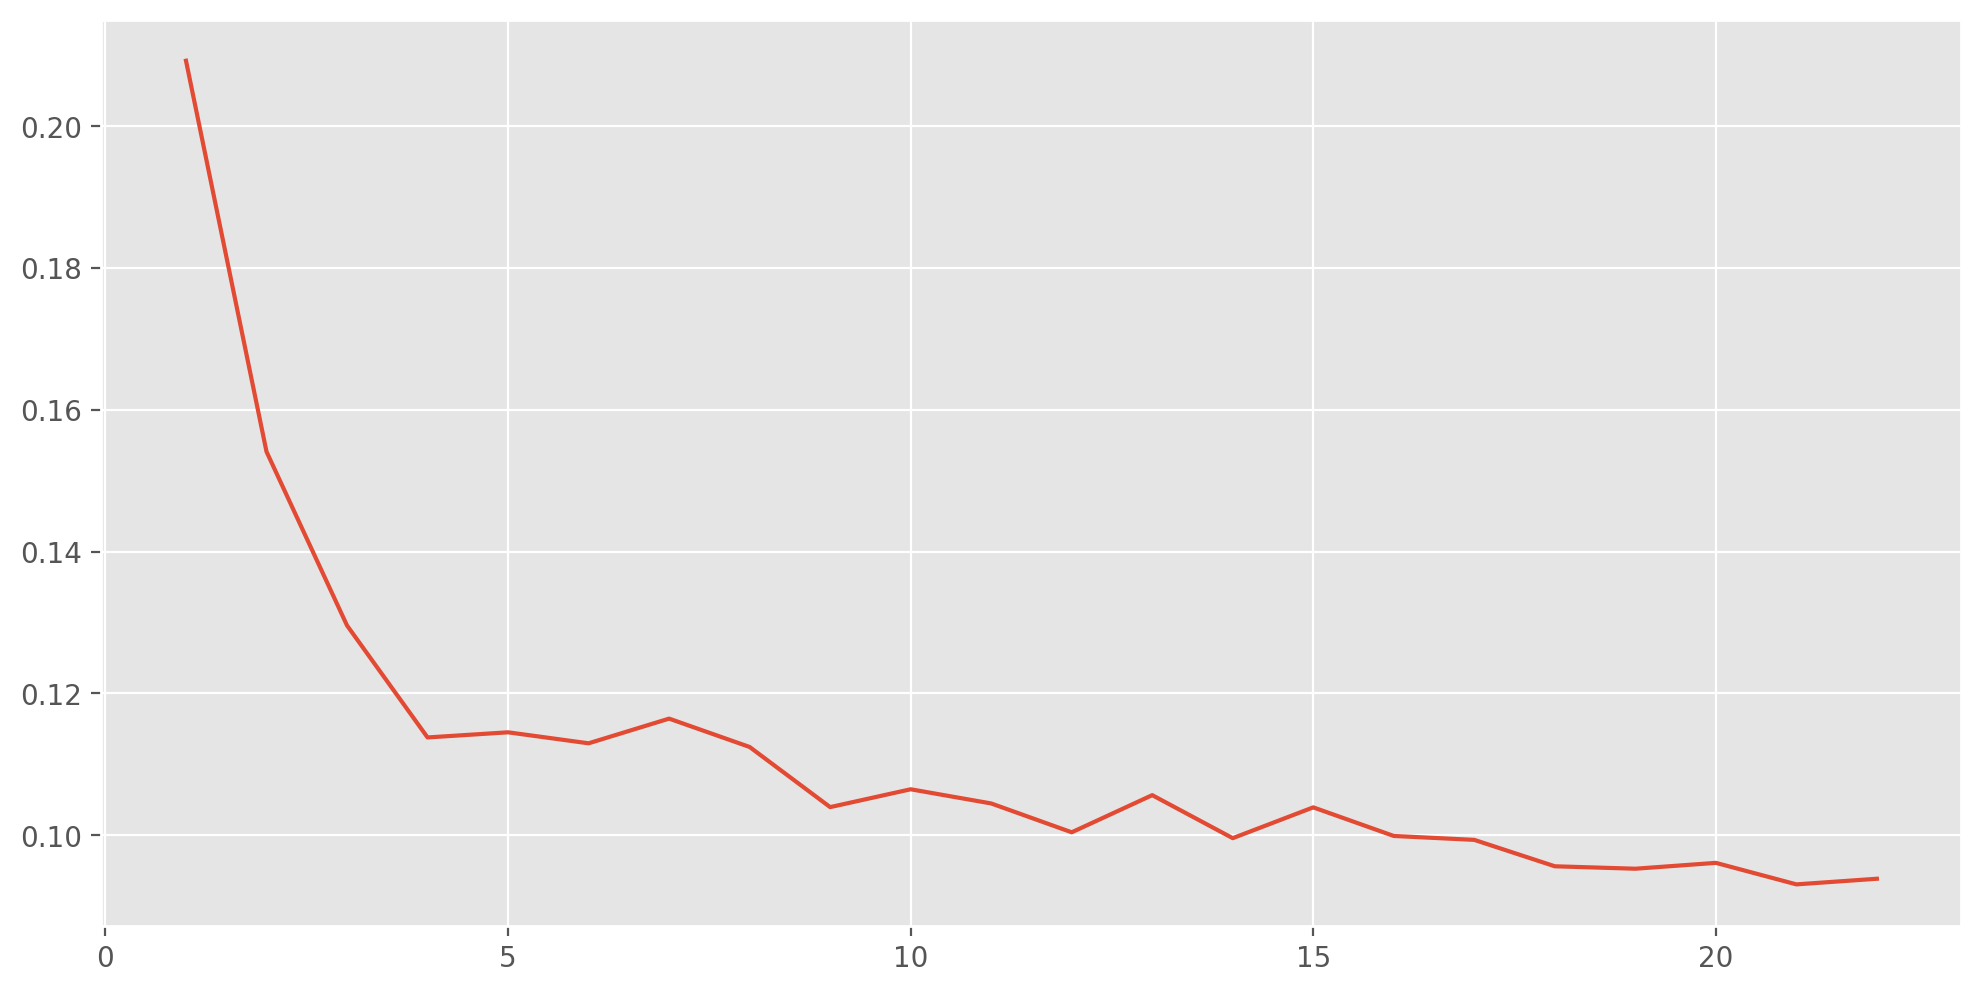

In [56]:
#lets explore Adaboost classifier
error=[]
for i in range(1,23):
    model=AdaBoostClassifier(n_estimators=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    error.append(1-accuracy_score(y_test,y_pred))
    
plt.figure(figsize=(12,6),dpi=200)
plt.plot(range(1,23),error)

In [57]:
#feature importnace for 23 n_estimators in adaboost
model.feature_importances_

array([0.09090909, 0.04545455, 0.22727273, 0.04545455, 0.        ,
       0.        , 0.        , 0.13636364, 0.        , 0.04545455,
       0.04545455, 0.09090909, 0.        , 0.09090909, 0.04545455,
       0.        , 0.        , 0.04545455, 0.        , 0.04545455,
       0.04545455, 0.        ])

In [58]:
#lets select adaboost classifier with minimal stump trees..
model=AdaBoostClassifier(n_estimators=22)
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=22)

In [59]:
y_pred=model.predict(X_test)

In [60]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.91      0.93      0.92     16497
              satisfied       0.90      0.88      0.89     12510

               accuracy                           0.91     29007
              macro avg       0.91      0.90      0.90     29007
           weighted avg       0.91      0.91      0.91     29007

[[15283  1214]
 [ 1509 11001]]


## Adaboost--91%

In [61]:
model=GradientBoostingClassifier(n_estimators=200)
model.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=200)

In [62]:
y_pred=model.predict(X_test)

In [63]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.96      0.95     16497
              satisfied       0.94      0.92      0.93     12510

               accuracy                           0.94     29007
              macro avg       0.94      0.94      0.94     29007
           weighted avg       0.94      0.94      0.94     29007

[[15795   702]
 [ 1037 11473]]


## gradient boosting--94%

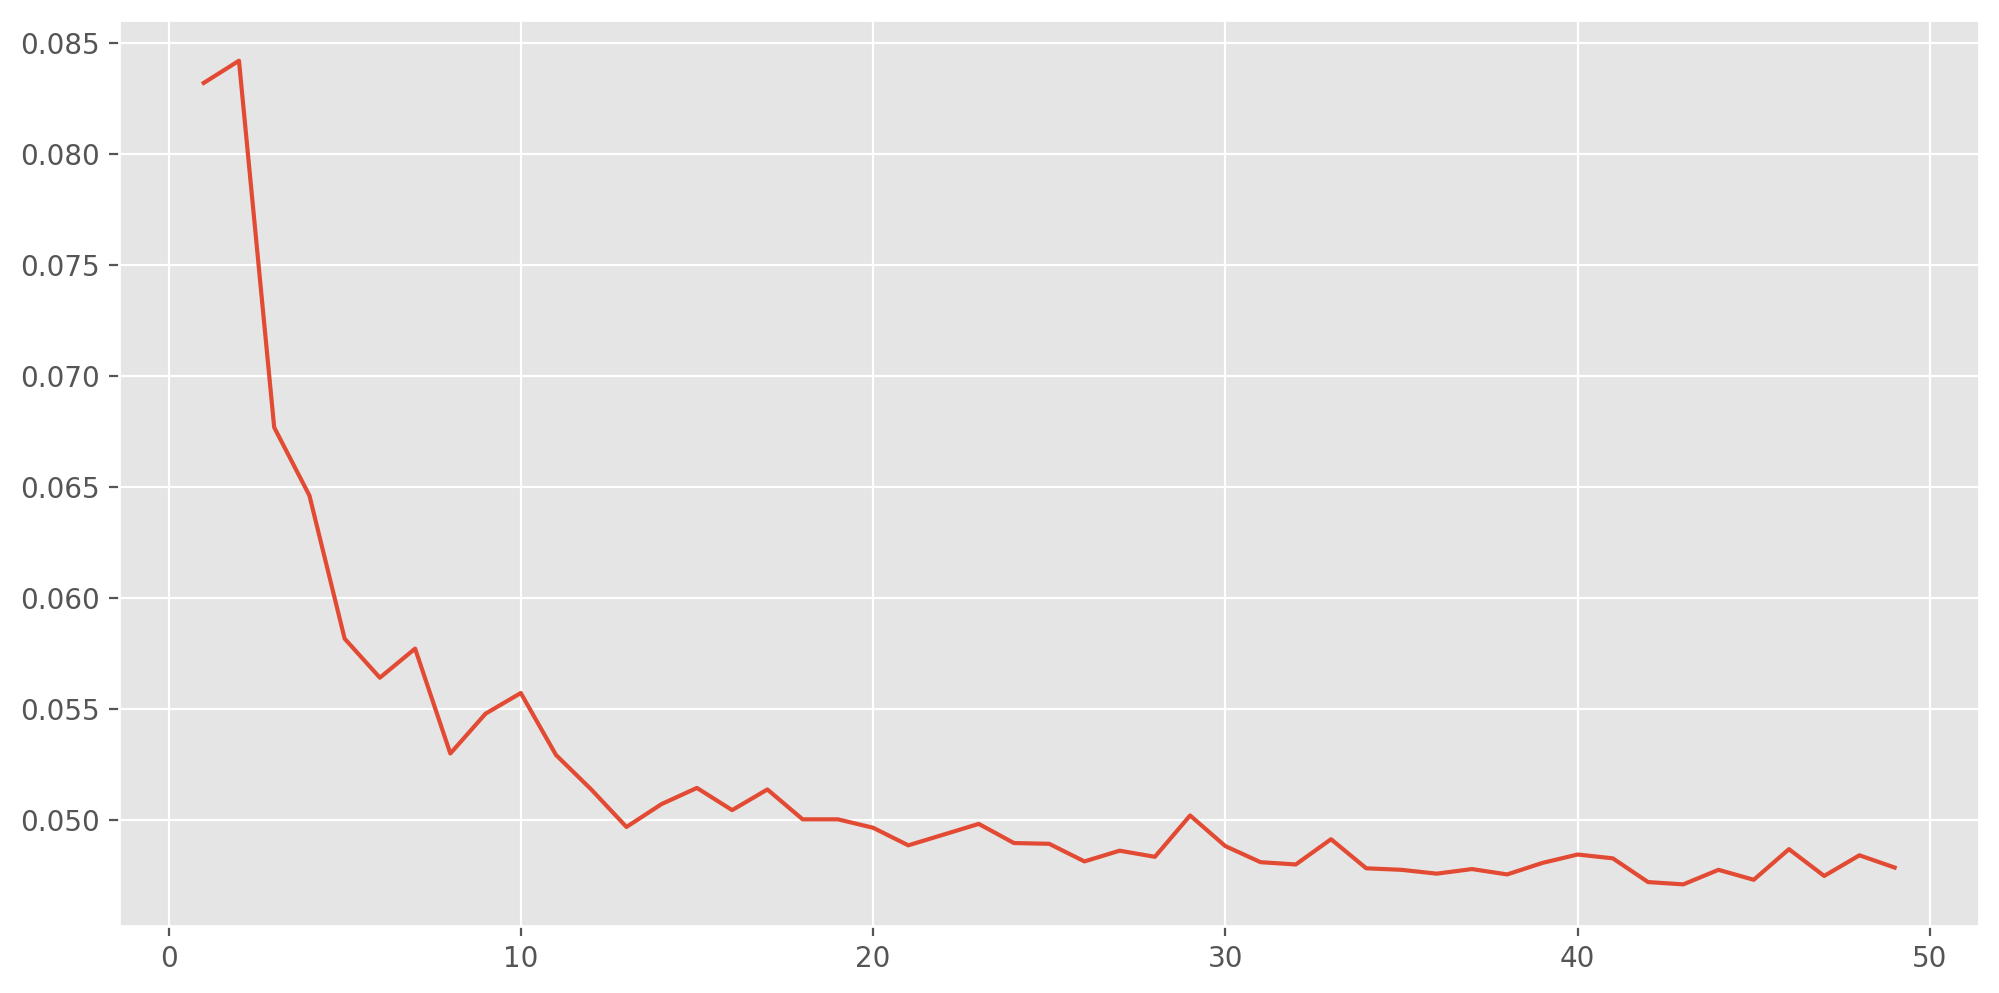

In [66]:
#random forest classifier
error=[]
for i in range(1,50):
    model=RandomForestClassifier(n_estimators=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    error.append(1-accuracy_score(y_test,y_pred))
    
plt.figure(figsize=(12,6),dpi=200)
plt.plot(range(1,50),error)

In [71]:
model=RandomForestClassifier(n_estimators=42)

In [72]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=42)

In [73]:
y_pred=model.predict(X_test)

In [74]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.97      0.96     16497
              satisfied       0.96      0.92      0.94     12510

               accuracy                           0.95     29007
              macro avg       0.95      0.95      0.95     29007
           weighted avg       0.95      0.95      0.95     29007

[[16055   442]
 [  955 11555]]


## random forest--95%

In [75]:
X=df_train.drop(["Gender_Female","Type of Travel_Personal Travel","Class_Eco","satisfaction"],axis=1)
y=df_train["satisfaction"]

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [79]:
#models that require scaling
models=[KNeighborsClassifier(n_neighbors=10),SVC(C=100,gamma="auto",kernel="rbf")]
for i in models:
    pipe=make_pipeline(StandardScaler(),i)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.90      0.97      0.93     12425
              satisfied       0.95      0.86      0.90      9331

               accuracy                           0.92     21756
              macro avg       0.92      0.91      0.92     21756
           weighted avg       0.92      0.92      0.92     21756

[[12008   417]
 [ 1344  7987]]
                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.95      0.95     12425
              satisfied       0.93      0.93      0.93      9331

               accuracy                           0.94     21756
              macro avg       0.94      0.94      0.94     21756
           weighted avg       0.94      0.94      0.94     21756

[[11813   612]
 [  695  8636]]


## KNN--92%...SVC--94%

In [80]:
#so right of the back best prediction comes out to be with random forest classifier

In [81]:
#lets create a gridsearch to check best parameters for random forest

In [94]:
X=df_train.drop(["Gender_Female","Type of Travel_Personal Travel","Class_Eco","satisfaction"],axis=1)
y=df_train["satisfaction"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [103]:
param_grid={"criterion":["gini","entropy"],"max_features":["auto","log2"],"bootstrap":[True,False]}

In [104]:
model=RandomForestClassifier(n_estimators=50,random_state=101)

In [105]:
grid=GridSearchCV(estimator=model,param_grid=param_grid,verbose=3,cv=3)

In [106]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END bootstrap=True, criterion=gini, max_features=auto;, score=0.950 total time=   2.3s
[CV 2/3] END bootstrap=True, criterion=gini, max_features=auto;, score=0.953 total time=   2.3s
[CV 3/3] END bootstrap=True, criterion=gini, max_features=auto;, score=0.953 total time=   2.3s
[CV 1/3] END bootstrap=True, criterion=gini, max_features=log2;, score=0.950 total time=   2.4s
[CV 2/3] END bootstrap=True, criterion=gini, max_features=log2;, score=0.953 total time=   2.4s
[CV 3/3] END bootstrap=True, criterion=gini, max_features=log2;, score=0.953 total time=   2.3s
[CV 1/3] END bootstrap=True, criterion=entropy, max_features=auto;, score=0.948 total time=   2.4s
[CV 2/3] END bootstrap=True, criterion=entropy, max_features=auto;, score=0.953 total time=   2.7s
[CV 3/3] END bootstrap=True, criterion=entropy, max_features=auto;, score=0.953 total time=   2.9s
[CV 1/3] END bootstrap=True, criterion=entropy, max_features=log2;,

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=50,
                                              random_state=101),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2']},
             verbose=3)

In [107]:
grid.best_params_
#using these parameters on test data

{'bootstrap': False, 'criterion': 'gini', 'max_features': 'auto'}

In [108]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31077 entries, 0 to 31076
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                31077 non-null  int64  
 1   Flight Distance                    31077 non-null  int64  
 2   Inflight wifi service              31077 non-null  int64  
 3   Departure/Arrival time convenient  31077 non-null  int64  
 4   Ease of Online booking             31077 non-null  int64  
 5   Gate location                      31077 non-null  int64  
 6   Food and drink                     31077 non-null  int64  
 7   Online boarding                    31077 non-null  int64  
 8   Seat comfort                       31077 non-null  int64  
 9   Inflight entertainment             31077 non-null  int64  
 10  On-board service                   31077 non-null  int64  
 11  Leg room service                   31077 non-null  int

In [145]:
X_train=df_train.drop(["Gender_Female","Type of Travel_Personal Travel","Class_Eco","satisfaction"],axis=1)
X_test=df_test.drop(["Gender_Female","Type of Travel_Personal Travel","Class_Eco"],axis=1)
y_train=df_train["satisfaction"]

In [146]:
model=RandomForestClassifier(bootstrap=False,criterion='gini',max_features='auto')
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False)

In [147]:
y_pred=model.predict(X_test)

In [148]:
len(y_pred)

21756

In [149]:
data=pd.DataFrame(y_pred,columns=["satisfaction"])

In [150]:
data

,satisfaction
0,satisfied
1,neutral or dissatisfied
2,satisfied
3,neutral or dissatisfied
4,neutral or dissatisfied
...,...
21751,neutral or dissatisfied
21752,satisfied
21753,neutral or dissatisfied
21754,satisfied


In [151]:
data.to_csv("Final73.csv",index=False)